Total Entropy: 0.940
Gain (S, Outlook): 0.247
Gain (S, Temperature): 0.029
Gain (S, Humidity): 0.152
Gain (S, Windy): 0.048


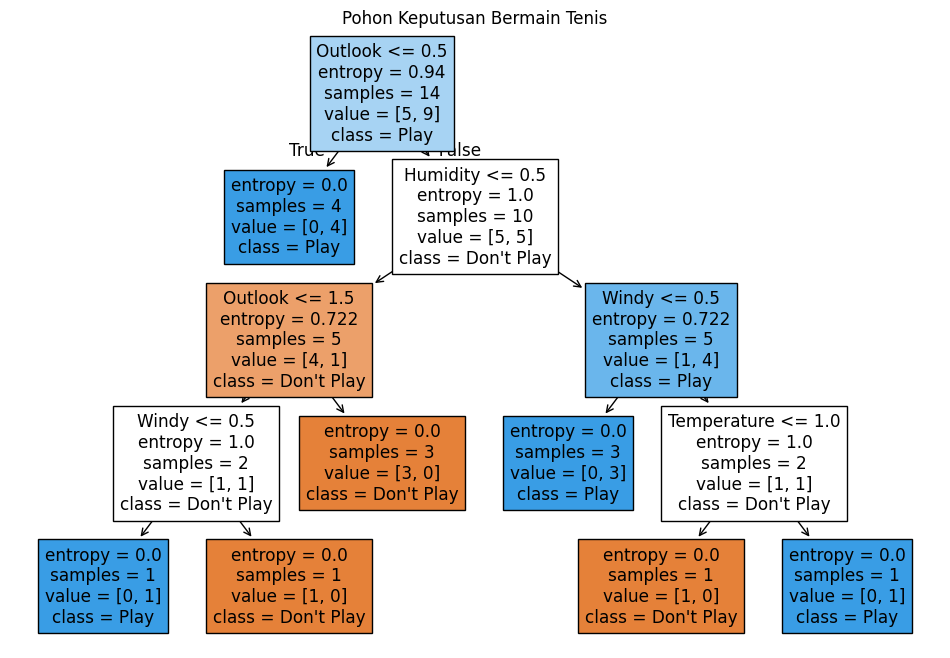


Hasil Prediksi Data Baru: Play


In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# =========================================================
# 1. DEFINISI DATASET (Berdasarkan Gambar Kuis)
# =========================================================
data = {
    'Outlook': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy',
                'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
              'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ['Don\'t Play', 'Don\'t Play', 'Play', 'Play', 'Play', 'Don\'t Play', 'Play',
             'Don\'t Play', 'Play', 'Play', 'Play', 'Play', 'Play', 'Don\'t Play']
}

df = pd.DataFrame(data)

# =========================================================
# 2. PERHITUNGAN ENTROPY & GAIN (LOGIKA MANUAL)
# =========================================================
def calculate_entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts))
                      for i in range(len(elements))])
    return entropy

def calculate_info_gain(data, split_attribute_name, target_name="Play"):
    total_entropy = calculate_entropy(data[target_name])
    vals, counts= np.unique(data[split_attribute_name], return_counts=True)

    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * calculate_entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])

    return total_entropy - weighted_entropy

# Menampilkan hasil Gain untuk Kuis No. 1
print(f"Total Entropy: {calculate_entropy(df['Play']):.3f}")
for col in ['Outlook', 'Temperature', 'Humidity', 'Windy']:
    print(f"Gain (S, {col}): {calculate_info_gain(df, col):.3f}")

# =========================================================
# 3. IMPLEMENTASI MODEL DECISION TREE (KUIS NO. 2)
# =========================================================
# Encoding data teks ke angka
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('Play', axis=1)
y = df_encoded['Play']

# Membuat model dengan kriteria Entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)

# Visualisasi
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Pohon Keputusan Bermain Tenis")
plt.show()

# =========================================================
# 4. PREDIKSI (MENGHILANGKAN WARNING)
# =========================================================
# Prediksi data baru: Outlook=Sunny, Temp=Cool, Humidity=Normal, Windy=No
data_prediksi = pd.DataFrame([[2, 0, 1, 0]], columns=X.columns)
hasil = model.predict(data_prediksi)
print(f"\nHasil Prediksi Data Baru: {le.inverse_transform(hasil)[0]}")